In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

### Data preparation, Data partitioning and normalization

In [0]:
class_name = 'Occupancy'
df1 = pd.read_csv('datatraining.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df2 =pd.read_csv('datatest.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df3=pd.read_csv('datatest2.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df4=pd.merge(df1, df2, how='outer')
df=pd.merge(df4, df3, how='outer')

In [0]:
df['Day']=pd.to_datetime(df['date']).dt.day
df['Hour']=pd.to_datetime(df['date']).dt.hour
df['Month']=pd.to_datetime(df['date']).dt.month
df['Year']=pd.to_datetime(df['date']).dt.year
df['Data']=pd.to_datetime(df['date']).dt.normalize()
del df['date']

In [0]:
df['Day']=df['Data'].dt.dayofweek
df.drop(['Year','Month','Data'], axis='columns', inplace=True)
del df['HumidityRatio']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [0]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## keras DNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(6, input_dim=n_feature, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

-The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.(The batch size is a number of samples processed before the model is updated)


-The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.(The number of epochs is the number of complete passes through the training dataset)

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

In [0]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, epochs=100, batch_size=30).history

Epoch 1/100
14392/14392 [==============================] - 1s 57us/step - loss: 0.1312 - accuracy: 0.9808
Epoch 2/100
14392/14392 [==============================] - 1s 36us/step - loss: 0.0459 - accuracy: 0.9893
Epoch 3/100
14392/14392 [==============================] - 1s 37us/step - loss: 0.0440 - accuracy: 0.9891
Epoch 4/100
14392/14392 [==============================] - 1s 37us/step - loss: 0.0434 - accuracy: 0.9892
Epoch 5/100
14392/14392 [==============================] - 1s 38us/step - loss: 0.0431 - accuracy: 0.9894
Epoch 6/100
14392/14392 [==============================] - 1s 37us/step - loss: 0.0430 - accuracy: 0.9894
Epoch 7/100
14392/14392 [==============================] - 1s 38us/step - loss: 0.0425 - accuracy: 0.9893
Epoch 8/100
14392/14392 [==============================] - 1s 41us/step - loss: 0.0423 - accuracy: 0.9894
Epoch 9/100
14392/14392 [==============================] - 1s 36us/step - loss: 0.0419 - accuracy: 0.9894
Epoch 10/100
14392/14392 [====================

In [0]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, epochs=100, batch_size=100).history

Epoch 1/100
14392/14392 [==============================] - 0s 18us/step - loss: 0.4053 - accuracy: 0.9208
Epoch 2/100
14392/14392 [==============================] - 0s 12us/step - loss: 0.0871 - accuracy: 0.9820
Epoch 3/100
14392/14392 [==============================] - 0s 12us/step - loss: 0.0561 - accuracy: 0.9877
Epoch 4/100
14392/14392 [==============================] - 0s 12us/step - loss: 0.0506 - accuracy: 0.9887
Epoch 5/100
14392/14392 [==============================] - 0s 14us/step - loss: 0.0482 - accuracy: 0.9888
Epoch 6/100
14392/14392 [==============================] - 0s 14us/step - loss: 0.0469 - accuracy: 0.9892
Epoch 7/100
14392/14392 [==============================] - 0s 14us/step - loss: 0.0459 - accuracy: 0.9893
Epoch 8/100
14392/14392 [==============================] - 0s 12us/step - loss: 0.0454 - accuracy: 0.9891
Epoch 9/100
14392/14392 [==============================] - 0s 12us/step - loss: 0.0446 - accuracy: 0.9892
Epoch 10/100
14392/14392 [====================

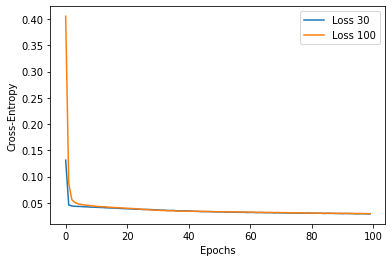

In [0]:
plt.plot(history1['loss'], label='Loss 30')
plt.plot(history2['loss'], label='Loss 100')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [0]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

6168/6168 [==============================] - 0s 19us/step
Loss 0.031074, Accuracy 0.990921
Loss 0.033413, Accuracy 0.992380


In [0]:
y_pred = model2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7689688715953308
F1-score [0.86939786 0.        ]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4743
           1       0.00      0.00      0.00      1425

    accuracy                           0.77      6168
   macro avg       0.38      0.50      0.43      6168
weighted avg       0.59      0.77      0.67      6168



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100).history

Train on 11513 samples, validate on 6168 samples
Epoch 1/50
11513/11513 [==============================] - 0s 29us/step - loss: 0.4153 - accuracy: 0.8668 - val_loss: 0.1656 - val_accuracy: 0.9650
Epoch 2/50
11513/11513 [==============================] - 0s 18us/step - loss: 0.1115 - accuracy: 0.9705 - val_loss: 0.0701 - val_accuracy: 0.9817
Epoch 3/50
11513/11513 [==============================] - 0s 20us/step - loss: 0.0654 - accuracy: 0.9831 - val_loss: 0.0481 - val_accuracy: 0.9906
Epoch 4/50
11513/11513 [==============================] - 0s 18us/step - loss: 0.0529 - accuracy: 0.9886 - val_loss: 0.0411 - val_accuracy: 0.9912
Epoch 5/50
11513/11513 [==============================] - 0s 19us/step - loss: 0.0486 - accuracy: 0.9892 - val_loss: 0.0384 - val_accuracy: 0.9916
Epoch 6/50
11513/11513 [==============================] - 0s 18us/step - loss: 0.0469 - accuracy: 0.9892 - val_loss: 0.0374 - val_accuracy: 0.9914
Epoch 7/50
11513/11513 [==============================] - 0s 20us/ste

In [0]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))

6168/6168 [==============================] - 0s 21us/step
Loss 0.031074, Accuracy 0.990921
Loss 0.033413, Accuracy 0.992380
Loss 0.034522, Accuracy 0.991569


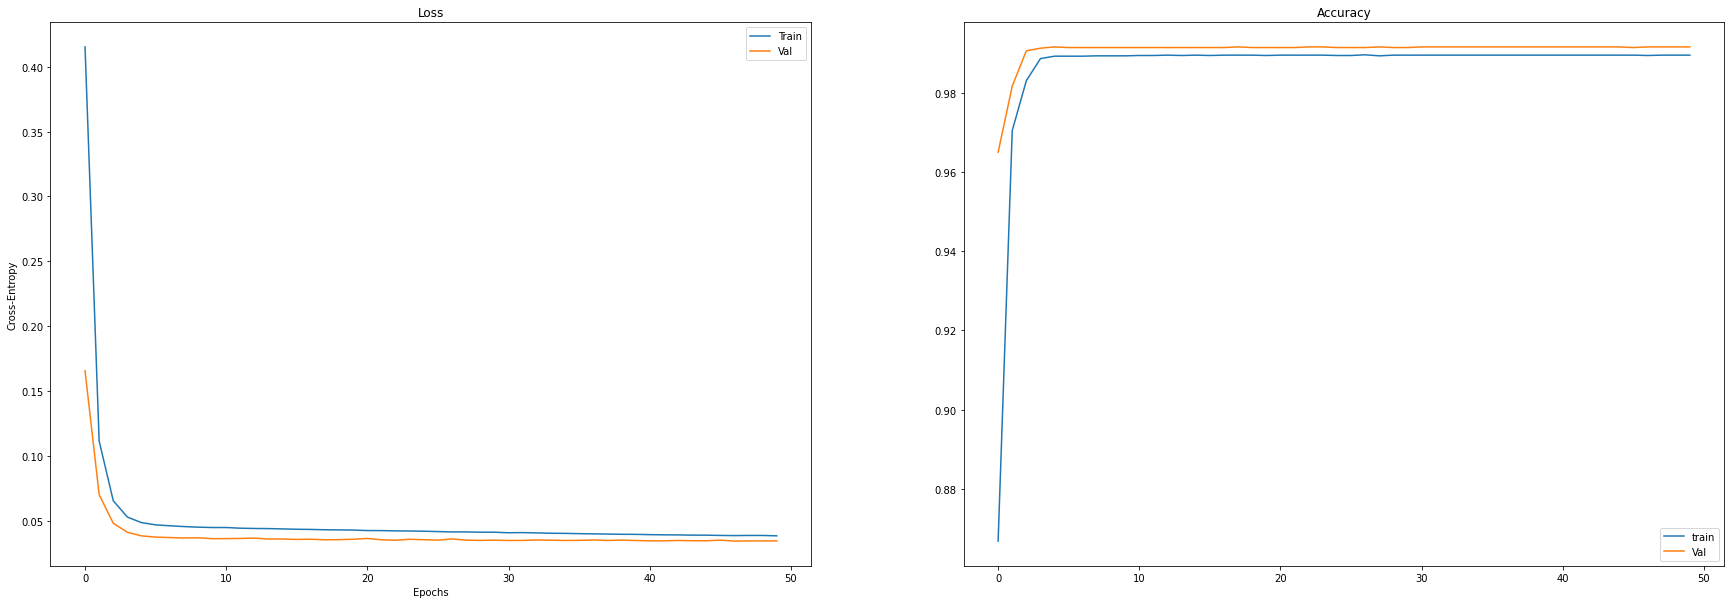

In [0]:
fig = plt.figure(figsize=(30, 10)) 
fig_dims = (1, 2)

#plot loss during training
plt.subplot2grid(fig_dims, (0, 0))
plt.title('Loss')
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
#plt.show()

# plot accuracy during training
plt.subplot2grid(fig_dims, (0,1))
plt.title('Accuracy')
plt.plot(history3['accuracy'], label='train')
plt.plot(history3['val_accuracy'], label='Val')
plt.legend()
#plt.show()

https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Early stopping

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, 
                      batch_size=100, callbacks=[es,mc]).history

Train on 11513 samples, validate on 2879 samples
Epoch 1/200
11513/11513 [==============================] - 0s 23us/step - loss: 0.3785 - accuracy: 0.9285 - val_loss: 0.1595 - val_accuracy: 0.9757
Epoch 2/200
11513/11513 [==============================] - 0s 14us/step - loss: 0.1054 - accuracy: 0.9814 - val_loss: 0.0645 - val_accuracy: 0.9875
Epoch 3/200
11513/11513 [==============================] - 0s 13us/step - loss: 0.0621 - accuracy: 0.9880 - val_loss: 0.0495 - val_accuracy: 0.9896
Epoch 4/200
11513/11513 [==============================] - 0s 14us/step - loss: 0.0529 - accuracy: 0.9889 - val_loss: 0.0446 - val_accuracy: 0.9899
Epoch 5/200
11513/11513 [==============================] - 0s 17us/step - loss: 0.0495 - accuracy: 0.9889 - val_loss: 0.0423 - val_accuracy: 0.9899
Epoch 6/200
11513/11513 [==============================] - 0s 16us/step - loss: 0.0476 - accuracy: 0.9890 - val_loss: 0.0408 - val_accuracy: 0.9899
Epoch 7/200
11513/11513 [==============================] - 0s 1

In [0]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

6168/6168 [==============================] - 0s 20us/step
Loss 0.031074, Accuracy 0.990921
Loss 0.033413, Accuracy 0.992380
Loss 0.034522, Accuracy 0.991569
Loss 0.030704, Accuracy 0.991407
